In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
from google.colab import files
import zipfile
import io

In [ ]:
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
zip_data = io.BytesIO(uploaded[file_name])
with zipfile.ZipFile(zip_data, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')

Saving Tomato_Bacterial_spot.zip to Tomato_Bacterial_spot.zip


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive', target_size=(64, 64), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive', target_size=(64, 64), batch_size=32, class_mode='categorical')

Found 50251 images belonging to 8 classes.
Found 50251 images belonging to 8 classes.


### convolutional neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    epochs=1,
    steps_per_epoch=10,
    validation_data=test_generator,
    validation_steps=10
)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.8850 - loss: 0.6319 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 261s 28s/step - accuracy: 0.8849 - loss: 0.6317 - val_accuracy: 0.8719 - val_loss: 0.6761


10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step
Confusion Matrix:
[[  0   0  17   0]
 [  0   0  13   0]
 [  0   0 276   0]
 [  0   0  14   0]]


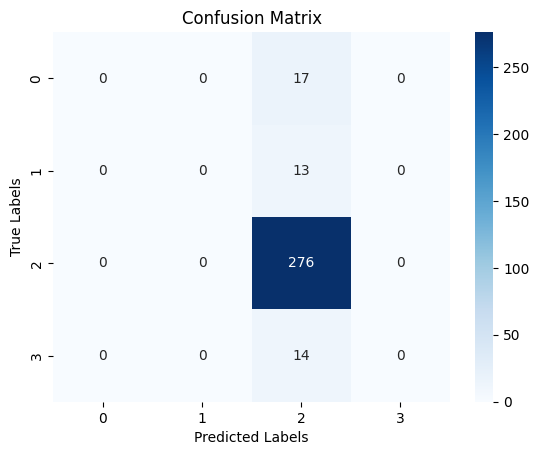

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = model.predict(test_generator, steps=10)


true_labels = []
for i in range(10):
    x, y = next(test_generator)  # Changed line
    true_labels.extend(np.argmax(y, axis=1))
true_labels = np.array(true_labels)


binary_predictions = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, binary_predictions)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=10)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 106s 11s/step - accuracy: 0.8427 - loss: 0.8408
Test Loss: 0.7053641080856323
Test Accuracy: 0.8687499761581421
